# XGBoost with carbon and nitrgen isotopes
## Added feature importance and confusion matrix

In [18]:
# Imports
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier

## Read the CSV

In [19]:
# load data
#dataset = loadtxt('presolargrains_C_only.csv', delimiter=",")
# Read csv file
carbon_nitrogen = pd.read_csv('presolargrains_C_N.csv')
carbon_nitrogen.head()

,Type,carbon_12_13,nitrogen_14_15
0,AB,1.57,59.0
1,AB,1.88,67.0
2,AB,1.94,78.0
3,AB,1.96,80.0
4,AB,2.15,118.0


## Train Test Split

In [20]:
# split data into X and y
X = carbon_nitrogen.loc[::1,'carbon_12_13':'nitrogen_14_15']
y = carbon_nitrogen['Type']

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Scale the data using MinMaxScalar

In [22]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit model

In [23]:
# fit model
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

## Print model

In [24]:
# Print model
print(model)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)


## Compare predictions to actual

In [25]:
# Make predictions for test data
y_pred = model.predict(X_test_scaled)
# Create and print dataframe with predicted and actual types
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,AB,AB
1,M,Z
2,M,M
3,AB,AB
4,M,M
5,M,M
6,AB,AB
7,M,M
8,AB,AB
9,Y,Y


## Report Accuracy

In [26]:
# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.80%


## Summary: 

### XGBoost with carbon and nitrogen isotopes: 95.8%

## Save the model

In [12]:
# Save this model. (already done)
#filename = 'XGBoost_C_N.sav'
#joblib.dump(model, filename)

['XGBoost_C_N.sav']

## Feature Importance

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 0 (0.535017)
2. feature 1 (0.464983)


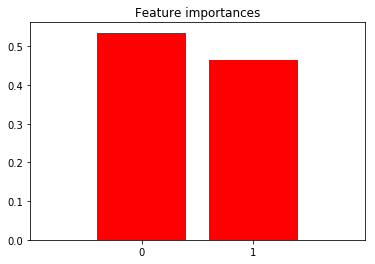

In [14]:
print(__doc__)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(2):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(2), importances[indices],
       color="r", align="center")
plt.xticks(range(2), indices)
plt.xlim([-1, 2])
plt.show()

## Confusion Matrix

In [15]:
target_names = ['AB', 'C', 'M', 'N', 'U', 'X', 'Y', 'Z']

In [16]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=target_names, index=target_names)
cm

,AB,C,M,N,U,X,Y,Z
AB,64,0,0,0,0,0,0,0
C,0,0,0,0,0,1,0,0
M,0,0,381,0,0,0,1,1
N,0,0,0,2,0,0,0,0
U,0,0,1,0,0,1,0,0
X,2,0,2,0,0,57,2,0
Y,0,0,2,0,0,0,21,0
Z,0,0,9,0,0,0,1,0


## Confusion Matrix with heatmap

Text(0.5, 1.0, 'Confusion Matrix XGBoost C N')

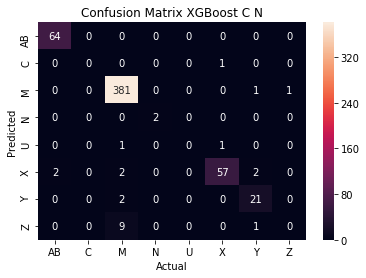

In [17]:
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt="d")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix XGBoost C N')